In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the dataset
loan_data = pd.read_csv('../data/loan_data.csv')


In [3]:
# Display the original dataframe shape
print(f"Original dataframe shape: {loan_data.shape}")

Original dataframe shape: (9578, 14)


In [4]:
df = loan_data.copy()

In [5]:
df.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [6]:
# Create FICO score categories
df['fico_category'] = pd.cut(
    df['fico'],
    bins=[0, 650, 700, 750, 850],
    labels=['Poor', 'Fair', 'Good', 'Excellent']
)

In [7]:
df['fico_category'].value_counts().sort_index()

fico_category
Poor          231
Fair         3990
Good         3687
Excellent    1670
Name: count, dtype: int64

In [8]:
# One-hot encode FICO categories
fico_dummies = pd.get_dummies(df['fico_category'], prefix='fico_cat')
df = pd.concat([df, fico_dummies], axis=1)
df.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,fico_category,fico_cat_Poor,fico_cat_Fair,fico_cat_Good,fico_cat_Excellent
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,Good,False,False,True,False
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,Good,False,False,True,False
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,Fair,False,True,False,False
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,Good,False,False,True,False
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,Fair,False,True,False,False


In [9]:
# Create interest rate tiers
df['interest_tier'] = pd.cut(
    df['int.rate'],
    bins=[0, 0.08, 0.12, 0.16, 0.22],
    labels=['Low', 'Medium', 'High', 'Very High']
)


In [10]:
# One-hot encode interest rate tiers
interest_dummies = pd.get_dummies(df['interest_tier'], prefix='int_tier')
df = pd.concat([df, interest_dummies], axis=1)


In [11]:
df.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,...,fico_category,fico_cat_Poor,fico_cat_Fair,fico_cat_Good,fico_cat_Excellent,interest_tier,int_tier_Low,int_tier_Medium,int_tier_High,int_tier_Very High
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,...,Good,False,False,True,False,Medium,False,True,False,False
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,...,Good,False,False,True,False,Medium,False,True,False,False
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,...,Fair,False,True,False,False,High,False,False,True,False
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,...,Good,False,False,True,False,Medium,False,True,False,False
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,...,Fair,False,True,False,False,High,False,False,True,False


In [12]:
# Create DTI categories
df['dti_category'] = pd.cut(
    df['dti'],
    bins=[0, 10, 20, 30],
    labels=['Low DTI', 'Medium DTI', 'High DTI']
)

# One-hot encode DTI categories
dti_dummies = pd.get_dummies(df['dti_category'], prefix='dti_cat')
df = pd.concat([df, dti_dummies], axis=1)
df.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,...,fico_cat_Excellent,interest_tier,int_tier_Low,int_tier_Medium,int_tier_High,int_tier_Very High,dti_category,dti_cat_Low DTI,dti_cat_Medium DTI,dti_cat_High DTI
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,...,False,Medium,False,True,False,False,Medium DTI,False,True,False
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,...,False,Medium,False,True,False,False,Medium DTI,False,True,False
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,...,False,High,False,False,True,False,Medium DTI,False,True,False
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,...,False,Medium,False,True,False,False,Low DTI,True,False,False
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,...,False,High,False,False,True,False,Medium DTI,False,True,False


In [13]:
# Create revolving utilization categories
df['revol_util_category'] = pd.cut(
    df['revol.util'],
    bins=[-1, 20, 40, 60, 80, 120],  # Starting from -1 to include 0
    labels=['Very Low', 'Low', 'Medium', 'High', 'Very High']
)

# One-hot encode revolving utilization categories
util_dummies = pd.get_dummies(df['revol_util_category'], prefix='util_cat')
df = pd.concat([df, util_dummies], axis=1)
df.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,...,dti_category,dti_cat_Low DTI,dti_cat_Medium DTI,dti_cat_High DTI,revol_util_category,util_cat_Very Low,util_cat_Low,util_cat_Medium,util_cat_High,util_cat_Very High
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,...,Medium DTI,False,True,False,Medium,False,False,True,False,False
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,...,Medium DTI,False,True,False,High,False,False,False,True,False
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,...,Medium DTI,False,True,False,Low,False,True,False,False,False
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,...,Low DTI,True,False,False,High,False,False,False,True,False
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,...,Medium DTI,False,True,False,Low,False,True,False,False,False


In [14]:
# Estimate loan amount based on installment amount, interest rate and term
# Assuming a 36-month term for all loans (common for personal loans)
term_months = 36

# The formula is: loan_amount = installment * ((1 - (1 + monthly_rate)^(-term)) / monthly_rate)
monthly_rate = df['int.rate'] / 12
df['loan_amount'] = df['installment'] * ((1 - (1 + monthly_rate)**(-term_months)) / monthly_rate)
df.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,...,dti_cat_Low DTI,dti_cat_Medium DTI,dti_cat_High DTI,revol_util_category,util_cat_Very Low,util_cat_Low,util_cat_Medium,util_cat_High,util_cat_Very High,loan_amount
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,...,False,True,False,Medium,False,False,True,False,False,25001.661439
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,...,False,True,False,High,False,False,False,True,False,7000.279673
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,...,False,True,False,Low,False,True,False,False,False,10799.797740
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,...,True,False,False,High,False,False,False,True,False,5025.265661
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,...,False,True,False,Low,False,True,False,False,False,3000.229254


In [15]:
# Convert days with credit line to years
df['credit_years'] = df['days.with.cr.line'] / 365

# Create credit history length categories
df['credit_history_length'] = pd.cut(
    df['credit_years'],
    bins=[0, 5, 10, 15, 100],
    labels=['< 5 years', '5-10 years', '10-15 years', '15+ years']
)

# One-hot encode credit history length
history_dummies = pd.get_dummies(df['credit_history_length'], prefix='cred_hist')
df = pd.concat([df, history_dummies], axis=1)


In [16]:
# Create interaction between FICO score and interest rate
df['fico_interest_interaction'] = df['fico'] * df['int.rate']

# Create interaction between DTI and revolving utilization
df['dti_util_interaction'] = df['dti'] * df['revol.util']


In [17]:
# Create a high-risk flag based on multiple conditions
df['high_risk_flag'] = ((df['fico'] < 700) & 
                        (df['int.rate'] > 0.12) & 
                        (df['dti'] > 15)).astype(int)


In [18]:
# Convert log annual income back to annual income
df['annual_income'] = np.exp(df['log.annual.inc'])

# Calculate monthly income
df['monthly_income'] = df['annual_income'] / 12

# Calculate payment to income ratio
df['payment_to_income_ratio'] = df['installment'] / df['monthly_income']



In [19]:
# Calculate credit inquiries per year of credit history
df['inquiries_per_year'] = df['inq.last.6mths'] * 2 / df['credit_years']
df['inquiries_per_year'] = df['inquiries_per_year'].replace([np.inf, -np.inf], np.nan).fillna(0)


In [20]:
# Create a combined risk score (higher means higher risk)
# Normalize each component first
fico_norm = (df['fico'] - df['fico'].min()) / (df['fico'].max() - df['fico'].min())
int_rate_norm = (df['int.rate'] - df['int.rate'].min()) / (df['int.rate'].max() - df['int.rate'].min())
dti_norm = (df['dti'] - df['dti'].min()) / (df['dti'].max() - df['dti'].min())
util_norm = (df['revol.util'] - df['revol.util'].min()) / (df['revol.util'].max() - df['revol.util'].min())

# Calculate risk score (inverting FICO since lower FICO means higher risk)
df['combined_risk_score'] = (1 - fico_norm) * 0.4 + int_rate_norm * 0.3 + dti_norm * 0.15 + util_norm * 0.15


In [21]:
# Create binary flags for potential risk factors
df['has_delinquency'] = (df['delinq.2yrs'] > 0).astype(int)
df['has_public_record'] = (df['pub.rec'] > 0).astype(int)
df['high_inquiries'] = (df['inq.last.6mths'] > 3).astype(int)
df['high_utilization'] = (df['revol.util'] > 70).astype(int)
df['meets_credit_policy'] = df['credit.policy']


In [22]:
# now after we have created all the features, let's analyze and visualize

print("\nDefault rate by FICO category:")
print(df.groupby('fico_category')['not.fully.paid'].mean().sort_values(ascending=False))

print("\nDefault rate by interest tier:")
print(df.groupby('interest_tier')['not.fully.paid'].mean().sort_values(ascending=False))

print("\nDefault rate by DTI category:")
print(df.groupby('dti_category')['not.fully.paid'].mean().sort_values(ascending=False))

print("\nDefault rate by high risk flag:")
print(df.groupby('high_risk_flag')['not.fully.paid'].mean())



Default rate by FICO category:
fico_category
Poor         0.320346
Fair         0.200501
Good         0.145104
Excellent    0.074251
Name: not.fully.paid, dtype: float64

Default rate by interest tier:
interest_tier
Very High    0.288793
High         0.186519
Medium       0.127701
Low          0.041562
Name: not.fully.paid, dtype: float64

Default rate by DTI category:
dti_category
High DTI      0.183159
Medium DTI    0.161134
Low DTI       0.146141
Name: not.fully.paid, dtype: float64

Default rate by high risk flag:
high_risk_flag
0    0.148473
1    0.213038
Name: not.fully.paid, dtype: float64


/tmp/ipykernel_8608/991449182.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(df.groupby('fico_category')['not.fully.paid'].mean().sort_values(ascending=False))
/tmp/ipykernel_8608/991449182.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(df.groupby('interest_tier')['not.fully.paid'].mean().sort_values(ascending=False))
/tmp/ipykernel_8608/991449182.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
 

/tmp/ipykernel_8608/162102911.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  default_by_fico = df.groupby('fico_category')['not.fully.paid'].mean().sort_values(ascending=False)
/tmp/ipykernel_8608/162102911.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  default_by_interest = df.groupby('interest_tier')['not.fully.paid'].mean().sort_values(ascending=False)


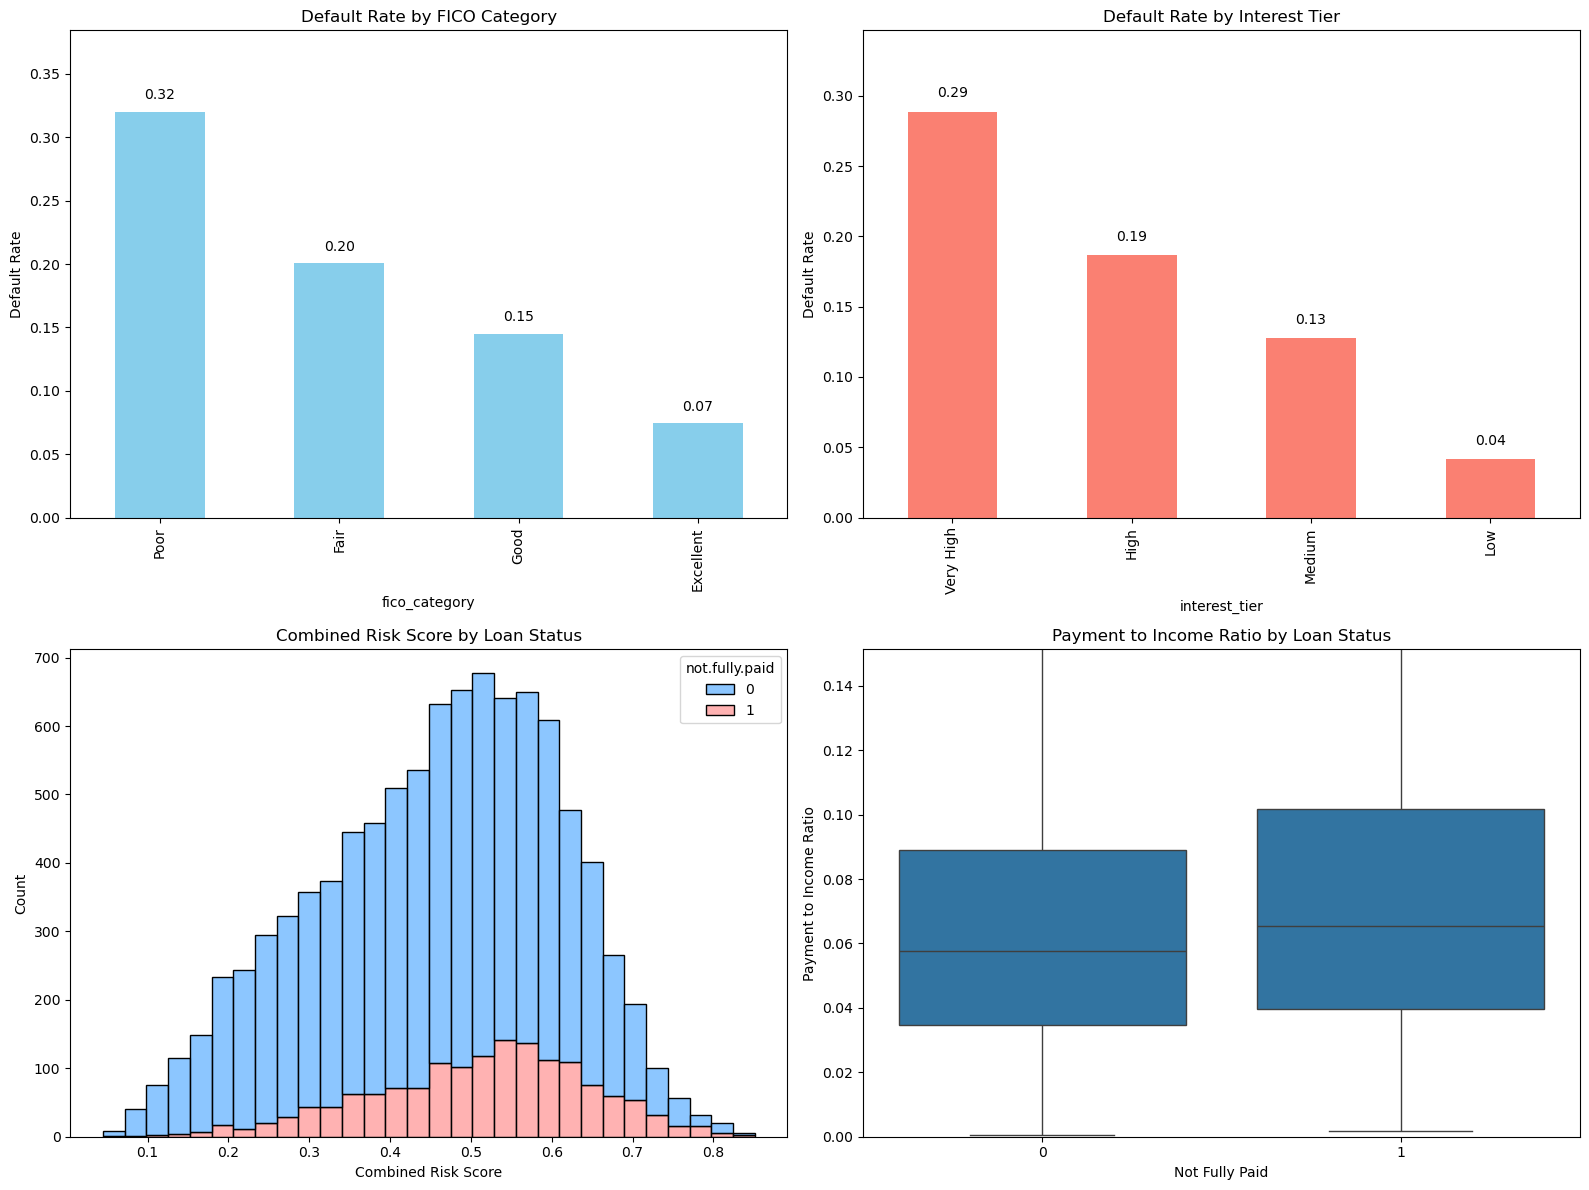

In [25]:
# figure with subplots
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Plot 1: Default rate by FICO category
default_by_fico = df.groupby('fico_category')['not.fully.paid'].mean().sort_values(ascending=False)
default_by_fico.plot(kind='bar', ax=axes[0, 0], color='skyblue')
axes[0, 0].set_title('Default Rate by FICO Category')
axes[0, 0].set_ylabel('Default Rate')
axes[0, 0].set_ylim(0, default_by_fico.max() * 1.2)
for i, v in enumerate(default_by_fico):
    axes[0, 0].text(i, v + 0.01, f"{v:.2f}", ha='center')
# Plot 2: Default rate by interest tier
default_by_interest = df.groupby('interest_tier')['not.fully.paid'].mean().sort_values(ascending=False)
default_by_interest.plot(kind='bar', ax=axes[0, 1], color='salmon')
axes[0, 1].set_title('Default Rate by Interest Tier')
axes[0, 1].set_ylabel('Default Rate')
axes[0, 1].set_ylim(0, default_by_interest.max() * 1.2)
for i, v in enumerate(default_by_interest):
    axes[0, 1].text(i, v + 0.01, f"{v:.2f}", ha='center')

# Plot 3: Combined risk score distribution
sns.histplot(data=df, x='combined_risk_score', hue='not.fully.paid', bins=30, 
             multiple='stack', ax=axes[1, 0], palette=['#66b3ff', '#ff9999'])
axes[1, 0].set_title('Combined Risk Score by Loan Status')
axes[1, 0].set_xlabel('Combined Risk Score')
axes[1, 0].set_ylabel('Count')

# Plot 4: Payment to income ratio by loan status
sns.boxplot(x='not.fully.paid', y='payment_to_income_ratio', data=df, ax=axes[1, 1])
axes[1, 1].set_title('Payment to Income Ratio by Loan Status')
axes[1, 1].set_xlabel('Not Fully Paid')
axes[1, 1].set_ylabel('Payment to Income Ratio')
axes[1, 1].set_ylim(0, df['payment_to_income_ratio'].quantile(0.95))  # Remove outliers for better visibility

plt.tight_layout()
plt.savefig('./figures/engineered_features_analysis.png')
plt.show()


In [26]:
print(f"\nFinal dataframe shape after feature engineering: {df.shape}")

# Show sample of the dataframe with new features
print("\nSample of dataframe with engineered features:")
print(df[['fico', 'fico_category', 'int.rate', 'interest_tier', 
          'loan_amount', 'high_risk_flag', 'combined_risk_score', 
          'payment_to_income_ratio', 'not.fully.paid']].head())



Final dataframe shape after feature engineering: (9578, 54)

Sample of dataframe with engineered features:
   fico fico_category  int.rate interest_tier   loan_amount  high_risk_flag  \
0   737          Good    0.1189        Medium  25001.661439               0   
1   707          Good    0.1071        Medium   7000.279673               0   
2   682          Fair    0.1357          High  10799.797740               0   
3   712          Good    0.1008        Medium   5025.265661               0   
4   667          Fair    0.1426          High   3000.229254               0   

   combined_risk_score  payment_to_income_ratio  not.fully.paid  
0             0.443624                 0.117049               0  
1             0.481827                 0.042133               0  
2             0.505469                 0.137573               0  
3             0.425037                 0.022919               0  
4             0.580854                 0.015285               0  


In [27]:
# Save the engineered features df
df.to_csv('../data/loan_data_engineered.csv', index=False)

print("\nFeature engineering completed. Engineered dataset saved as 'loan_data_engineered.csv'")


Feature engineering completed. Engineered dataset saved as 'loan_data_engineered.csv'
